# zgulde plotting lib demo

- [2-series bar plot](#2-series-bar-plot)
- [bar plot by group](#bar-plot-by-group)
- [histograms by group](#histograms-by-group)
- [Scatter by group](#Scatter-by-group)
- [3d plots](#3d-plots)
- [dual axis plotting](#dual-axis-plotting)
- [Comapre 2 Categorical Vars](#Comapre-2-Categorical-Vars)
    - [Heatmaps From Crosstabs](#Heatmaps-From-Crosstabs)
    - [A "scatter plot" for group proportions](#A-"scatter-plot"-for-group-proportions)
    - [Group Proportions Bar Chart](#Group-Proportions-Bar-Chart)

In [1]:
%matplotlib inline
import pydataset
import matplotlib.pyplot as plt
import pandas as pd

import zgulde.ds_util.plotting as zplot

In [2]:
plt.style.use(zplot.style)

A couple datasets for demonstration purposes:

In [3]:
tips = pydataset.data('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## 2-series bar plot

In [5]:
help(zplot.bar_dual_y)

Help on function bar_dual_y in module zgulde.ds_util.plotting:

bar_dual_y(df: pandas.core.frame.DataFrame, x: str, y1: str, y2: str, aggfunc='mean', space=0.1, ax=None, colors=['lightblue', 'orange'])



(<Figure size 1152x648 with 2 Axes>,
 (<AxesSubplot:title={'center':'mean of tip and total_bill by day'}, xlabel='day', ylabel='tip'>,
  <AxesSubplot:ylabel='total_bill'>))

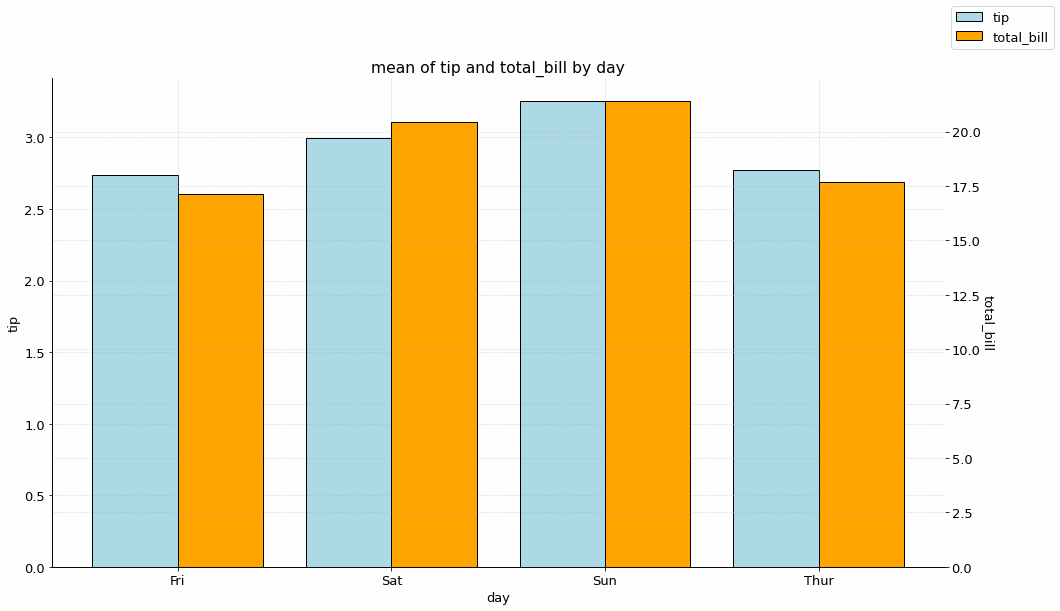

In [6]:
zplot.bar_dual_y(tips, 'day', 'tip', 'total_bill')

## bar plot by group

In [7]:
help(zplot.bar_by_group)

Help on function bar_by_group in module zgulde.ds_util.plotting:

bar_by_group(x: pandas.core.series.Series, g: pandas.core.series.Series, aggfunc='mean', *args, **kwargs)
    >>> mpg = data('mpg')
    >>> bar_by_group(mpg.hwy, mpg['class'])
    (<Figure size ... with 1 Axes>, <matplotlib.axes._subplots.AxesSubplot object at ...>)



(<Figure size 1152x648 with 1 Axes>,
 <AxesSubplot:title={'center':'mean of hwy by class'}, xlabel='class'>)

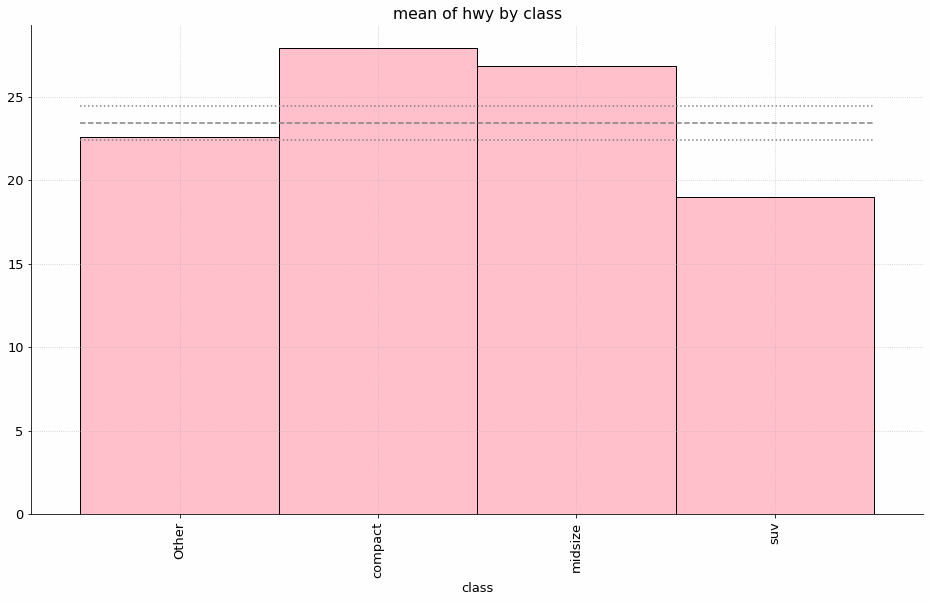

In [8]:
zplot.bar_by_group(mpg.hwy, mpg['class'])

## histograms by group

In [9]:
help(zplot.hist_by_group)

Help on function hist_by_group in module zgulde.ds_util.plotting:

hist_by_group(x: pandas.core.series.Series, g: pandas.core.series.Series, *args, **kwargs)
    >>> mpg = data('mpg')
    >>> hist_by_group(mpg.hwy, mpg.cyl)
    (<Figure size ... with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at ...>,
            <matplotlib.axes._subplots.AxesSubplot object at ...>],
           [<matplotlib.axes._subplots.AxesSubplot object at ...>,
            <matplotlib.axes._subplots.AxesSubplot object at ...>]],
          dtype=object))



(<Figure size 1152x648 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Sun'}>,
         <AxesSubplot:title={'center':'Sat'}>],
        [<AxesSubplot:title={'center':'Thur'}>,
         <AxesSubplot:title={'center':'Other'}>]], dtype=object))

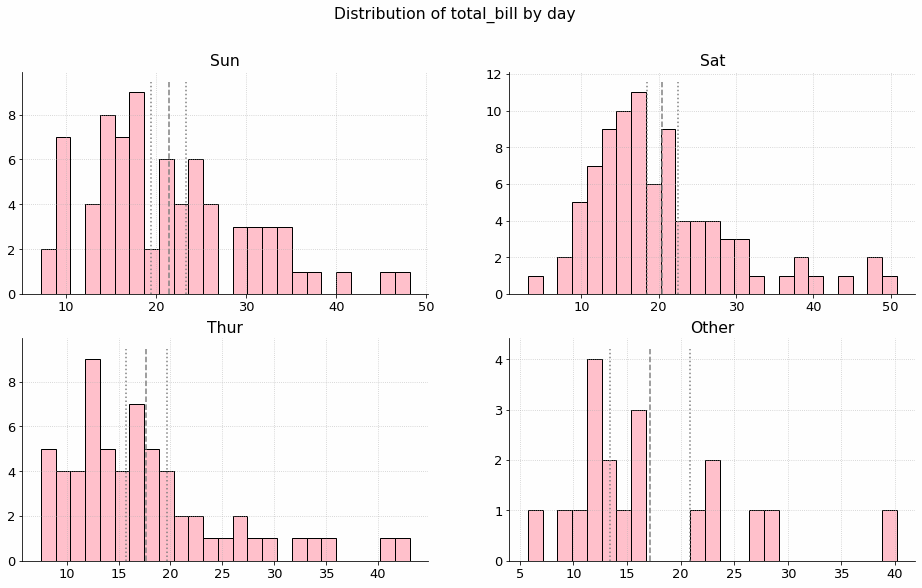

In [10]:
zplot.hist_by_group(tips.total_bill, tips.day)

## Scatter by group

In [11]:
help(zplot.scatter_by_group)

Help on function scatter_by_group in module zgulde.ds_util.plotting:

scatter_by_group(df: pandas.core.frame.DataFrame, x: str, y: str, g: str)



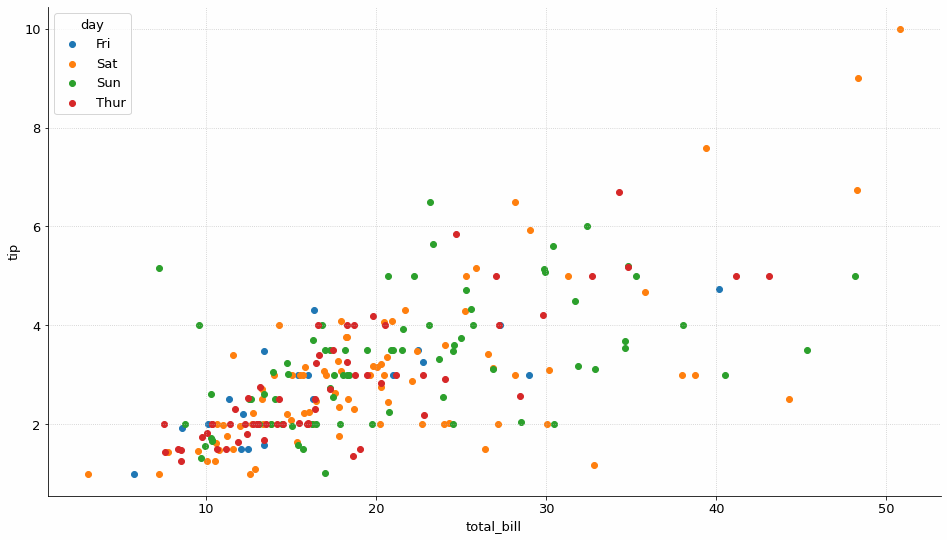

In [12]:
zplot.scatter_by_group(tips, 'total_bill', 'tip', 'day')

## 3d plots

In [13]:
help(zplot.plot_3d)

Help on function plot_3d in module zgulde.ds_util.plotting:

plot_3d(df, x, y, z, g)



/Users/zach/repos/github.com/zgulde/zgulde-python/zgulde/ds_util/plotting.py:99: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


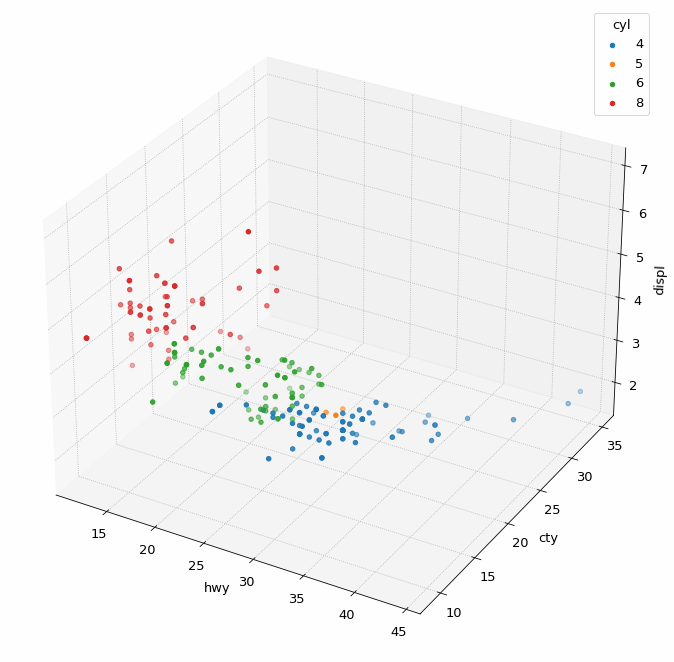

In [14]:
zplot.plot_3d(mpg, 'hwy', 'cty', 'displ', 'cyl')

## dual axis plotting

In [15]:
help(zplot.dual_axis)

Help on function dual_axis in module zgulde.ds_util.plotting:

dual_axis(df: pandas.core.frame.DataFrame, x: str) -> Callable
    >>> mpg = data("mpg")
    >>> dual_axis(mpg, "displ")("hwy")("cty")
    <Figure size ... with 2 Axes>



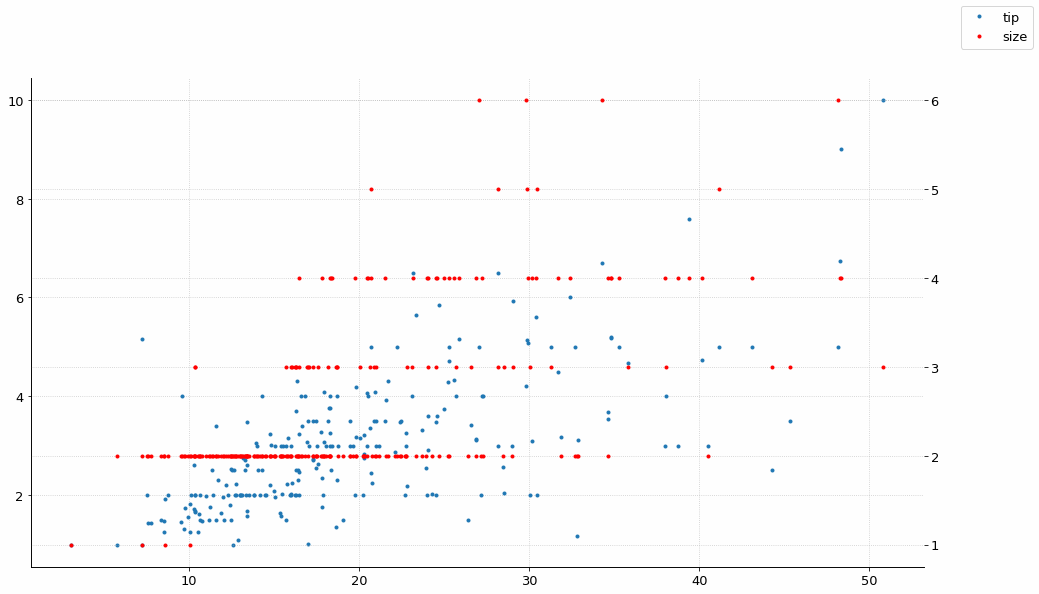

In [16]:
fig = zplot.dual_axis(tips, 'total_bill')('tip', '.', label='tip')('size', 'r.', label='size')
fig.legend()

In [17]:
help(zplot.bar_dual_y)

Help on function bar_dual_y in module zgulde.ds_util.plotting:

bar_dual_y(df: pandas.core.frame.DataFrame, x: str, y1: str, y2: str, aggfunc='mean', space=0.1, ax=None, colors=['lightblue', 'orange'])



(<Figure size 1152x648 with 2 Axes>,
 (<AxesSubplot:title={'center':'mean of total_bill and tip by day'}, xlabel='day', ylabel='total_bill'>,
  <AxesSubplot:ylabel='tip'>))

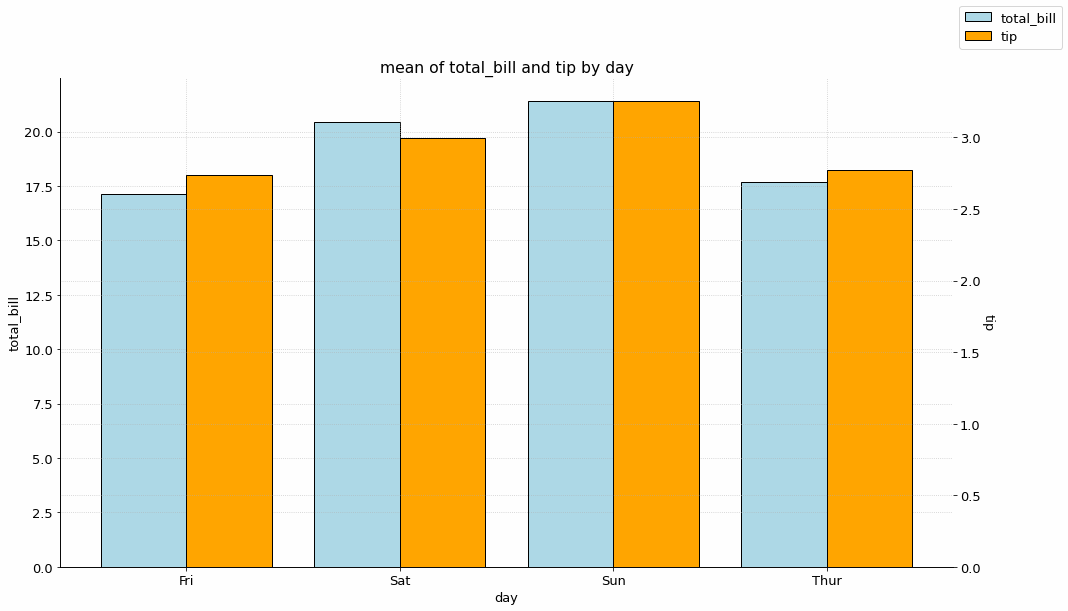

In [18]:
zplot.bar_dual_y(tips, 'day', 'total_bill', 'tip')

## Comapre 2 Categorical Vars

### Heatmaps From Crosstabs

In [19]:
help(zplot.crosstab_heatmap)

Help on function crosstab_heatmap in module zgulde.ds_util.plotting:

crosstab_heatmap(x: pandas.core.series.Series, y: pandas.core.series.Series, ax=None, values=None, aggfunc=None, normalize=False, cmap='Purples', fmt=None)



<AxesSubplot:xlabel='size', ylabel='time'>

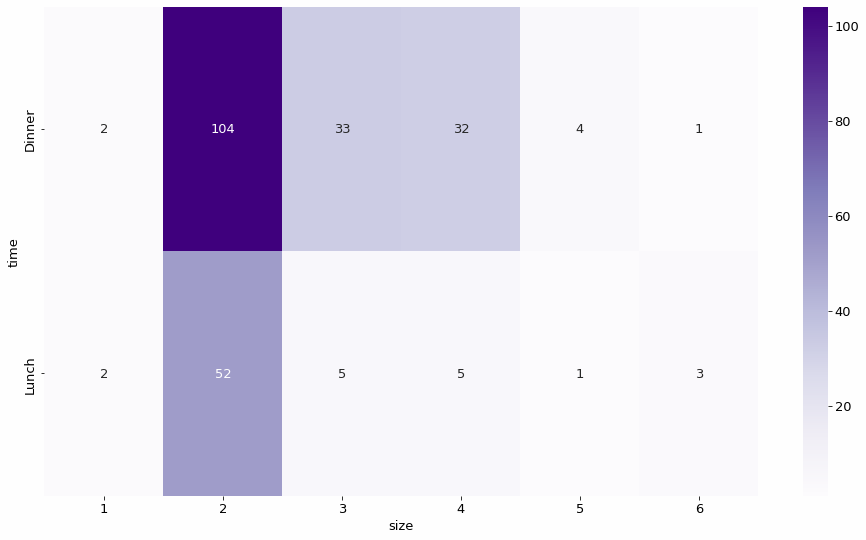

In [20]:
zplot.crosstab_heatmap(tips.time, tips['size'])

The values don't have to be just the counts.

<AxesSubplot:xlabel='size', ylabel='time'>

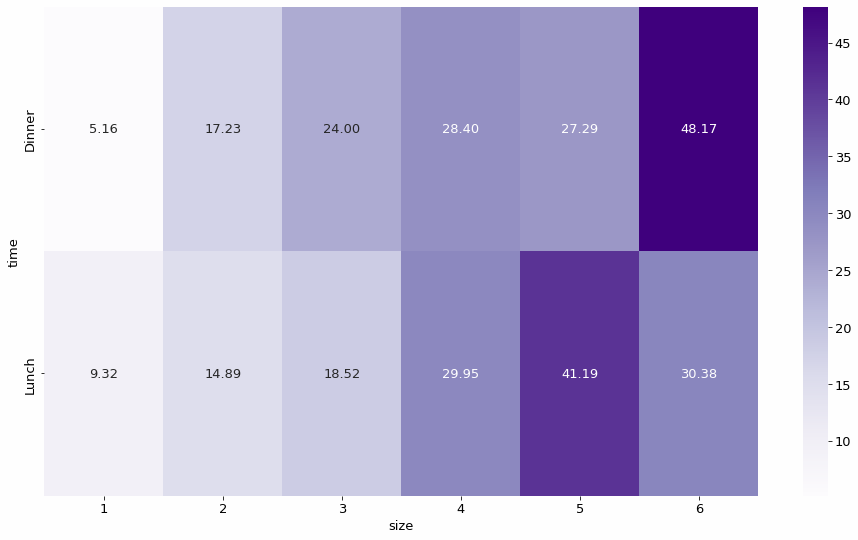

In [21]:
zplot.crosstab_heatmap(tips.time, tips['size'], values=tips.total_bill, aggfunc='mean')

### A "scatter plot" for group proportions

In [22]:
help(zplot.crosstab_scatter)

Help on function crosstab_scatter in module zgulde.ds_util.plotting:

crosstab_scatter(x: pandas.core.series.Series, y: pandas.core.series.Series, ax=None, scale=1000, values=None, aggfunc=None)
    Visualize the crosstabulation of x and y with a scatter plot where the size
    of the points corresponds to the value of that cell in the crosstabulation.
    
    For an aggregation other than counting, values and aggfunc can be passed.
    Internally, x, y, values, and aggfunc are all passed to pd.crosstab.



<AxesSubplot:xlabel='class', ylabel='cyl'>

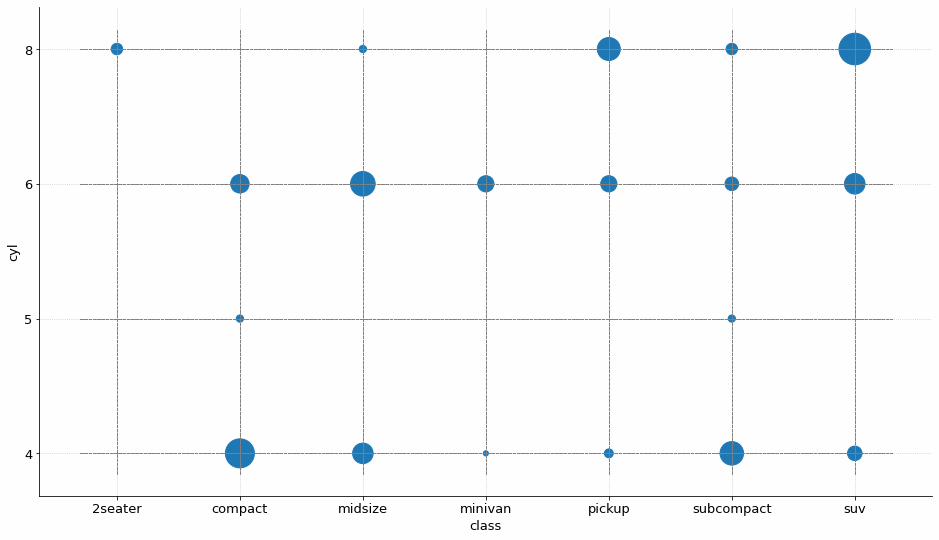

In [23]:
zplot.crosstab_scatter(mpg['class'], mpg.cyl)

The `scale` argument changes the size of the circles.

<AxesSubplot:xlabel='class', ylabel='cyl'>

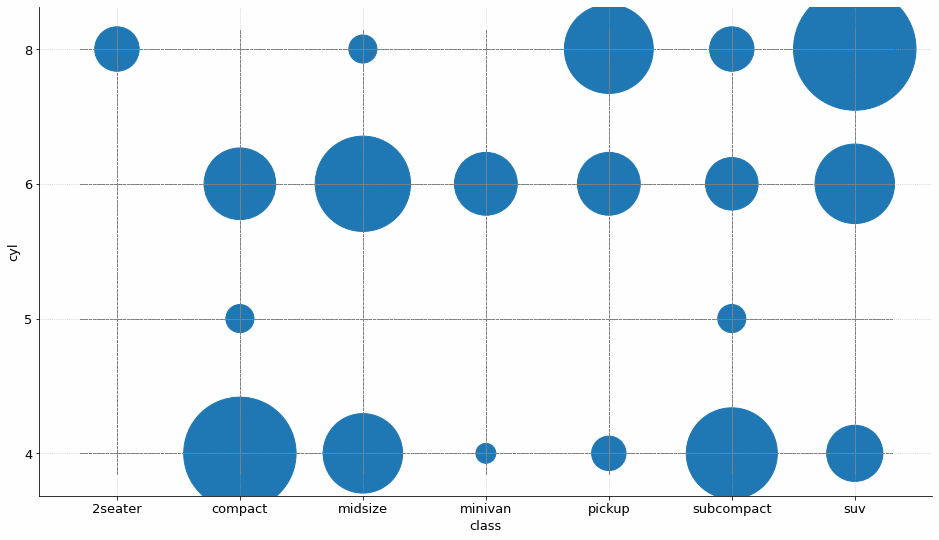

In [24]:
zplot.crosstab_scatter(mpg['class'], mpg.cyl, scale=15_000)

The values that the size of the circle is based on can be customized as well.

<AxesSubplot:xlabel='class', ylabel='cyl'>

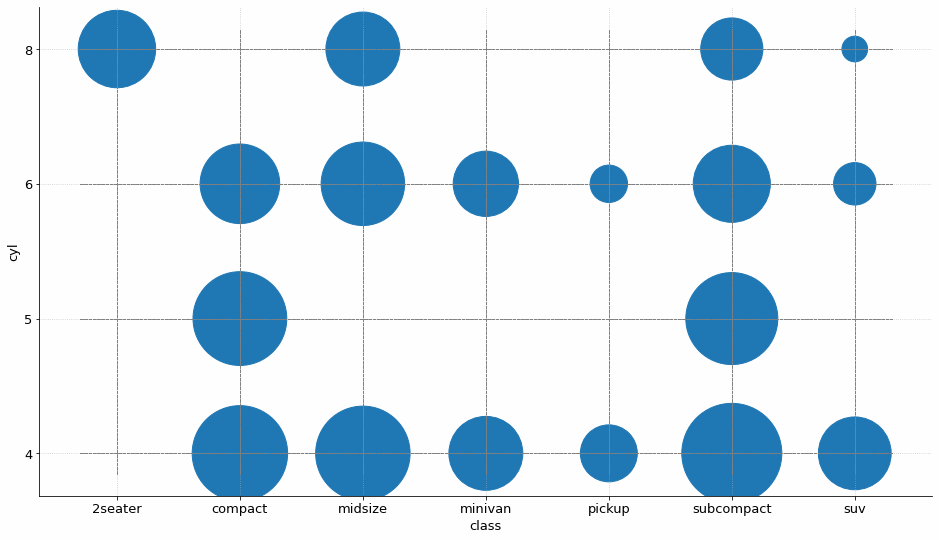

In [25]:
zplot.crosstab_scatter(mpg['class'], mpg.cyl, values=mpg.hwy, aggfunc='mean', scale=10_000)

### Group Proportions Bar Chart

Raw Counts

In [26]:
help(zplot.group_proportions)

Help on function group_proportions in module zgulde.ds_util.plotting:

group_proportions(df: pandas.core.frame.DataFrame, x1: str, x2: str, proportions=False, ax=None)
    Visualize the proportion of each group in x2 for each unique group in x1.
    
    x1 and x2 should both be categorical variables.



<AxesSubplot:xlabel='size', ylabel='count'>

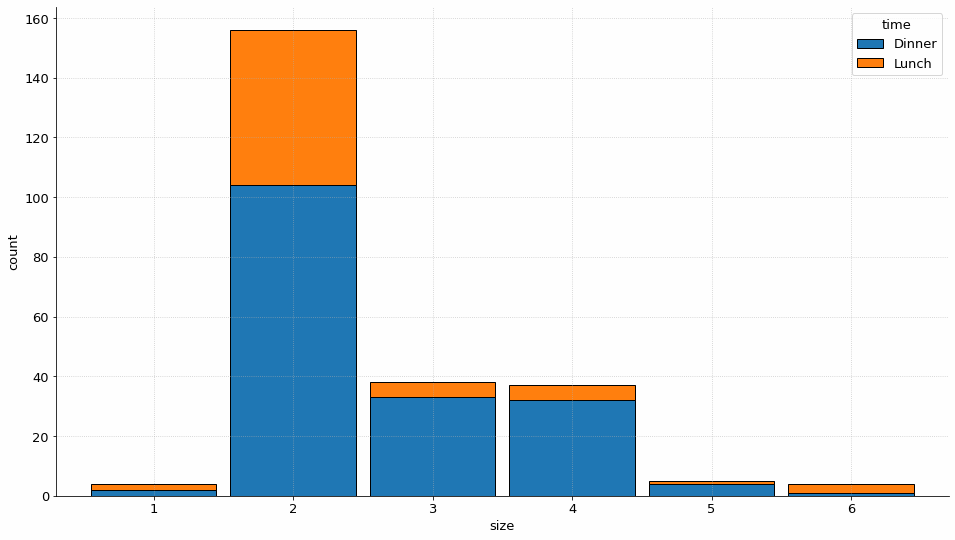

In [27]:
zplot.group_proportions(tips, 'size', 'time')

Proportions

<AxesSubplot:xlabel='size', ylabel='proportion'>

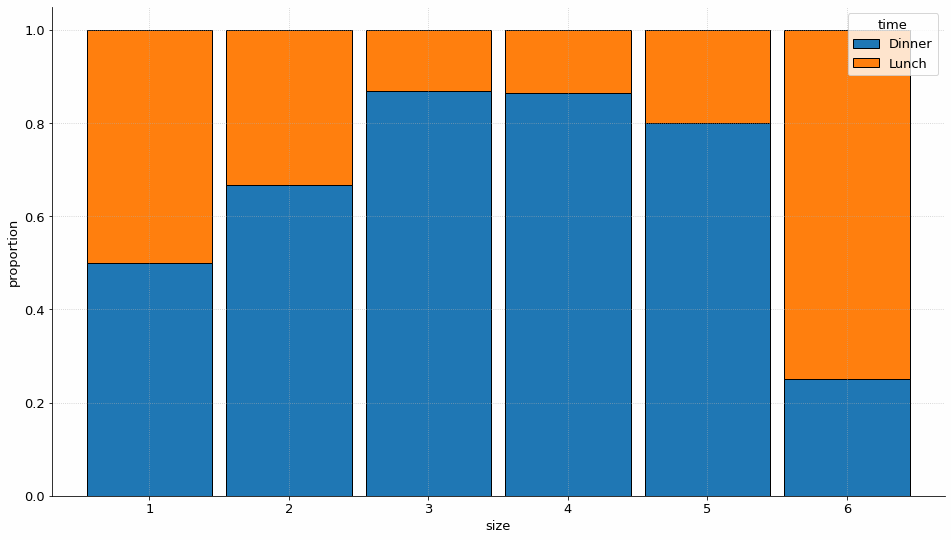

In [28]:
zplot.group_proportions(tips, 'size', 'time', proportions=True)

## Timeline

[]

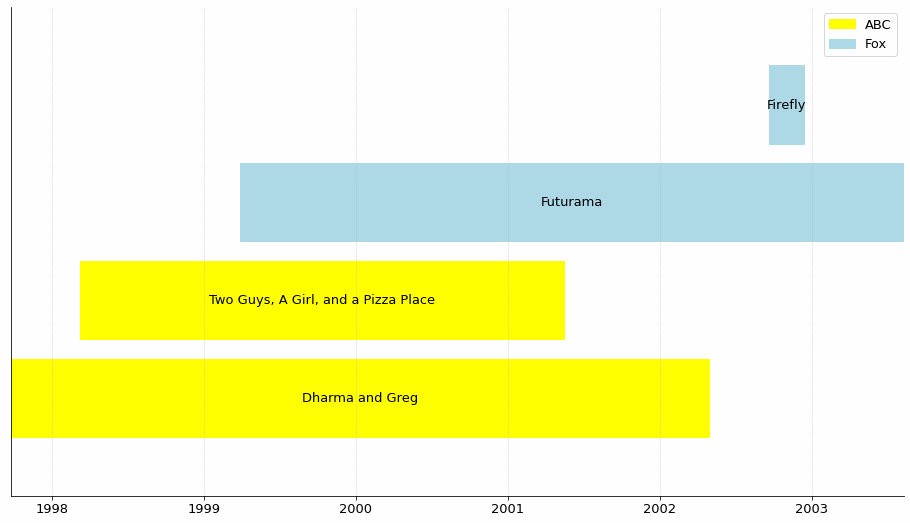

In [29]:
tv_shows = pd.DataFrame({
    'show':        ['Firefly',    'Futurama',   'Two Guys, A Girl, and a Pizza Place', 'Dharma and Greg'],
    'first_aired': ['2002-09-20', '1999-03-28', '1998-03-10',                          '1997-09-24'],
    'last_aired':  ['2002-12-13', '2003-08-10', '2001-05-16',                          '2002-04-30'],
    'network':     ['Fox',        'Fox',        'ABC',                                 'ABC'],
})
tv_shows.first_aired = pd.to_datetime(tv_shows.first_aired)
tv_shows.last_aired = pd.to_datetime(tv_shows.last_aired)
tv_shows = tv_shows.sort_values(by='first_aired')

fig, ax = plt.subplots()

zplot.timeline(tv_shows, x_start='first_aired', x_end='last_aired', text='show', colors={
    'yellow': lambda row: row.network == 'ABC',
    'lightblue': lambda row: row.network == 'Fox',
}, colorlabels={'yellow': 'ABC', 'lightblue': 'Fox'})
ax.set_yticks([])